In [ ]:
# import packages
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# metrics 
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# plotting style, you can choose your own parameters
import matplotlib

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

In [ ]:
def plot_clf(model, X, y, title): 
    
    '''
        A function to plot confusion matrix and ROC curve 
        
        Args: 
            model(classifier object): model object (e.g. RandomForestClassifier, LogisticRegression)
            X(np.array): feature set
            y(np.array): label set 
            title(str): plot name
            
        Example Usage: 
            plot_clf(model, X_test, y_test, "test")
    '''
    
    fig, [ax_roc, ax_conf] = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout()
    
    RocCurveDisplay.from_estimator(model, X, y, ax=ax_roc)
    ConfusionMatrixDisplay.from_estimator(model, X, y, ax=ax_conf)

    ax_roc.set_title('{} ROC'.format(title))
    ax_conf.set_title('{} Confusion Matrix'.format(title))

    plt.show()

## <center>Problem 1 (Preliminary Modeling) <center>

In [ ]:
# Download data 

!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_X.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_y.csv

--2022-02-17 00:26:25--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469363 (458K) [text/plain]
Saving to: ‘breastcancer_X.csv.4’

breastcancer_X.csv. 100%[===================>] 458.36K  --.-KB/s    in 0.006s  

2022-02-17 00:26:25 (81.1 MB/s) - ‘breastcancer_X.csv.4’ saved [469363/469363]

--2022-02-17 00:26:25--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/breastcancer_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

### 1.1 (5 points) Load and inspect the raw data

We have provided the code to load the dataset. Take a moment to understand what each line is doing. Briefy explain what each line of the code is doing by providing short comments below. 

You will have to do it by yourself again in Problem 2.

In [ ]:
p1_X = pd.read_csv("./breastcancer_X.csv", header='infer', index_col=0) # reads the csv file, containing the breast cancer feature vector inputs, into a pandas Dataframe
p1_y = pd.read_csv("./breastcancer_y.csv", header='infer', index_col=0) # reads the csv file, containing the breast cancer labels, into a pandas Dataframe 

metabolite_name = p1_X.columns.tolist() # converts the p1_X column names (features) into a list

p1_X = p1_X.values # stores a numpy representation of the feature vector values
p1_y = p1_y.values # stores a numpy representation of the breast cancer diagnosis values

Report how many examples are in this dataset and the number of features for each data point.

In [ ]:
########## Answer ############

rows, cols = p1_X.shape
print("There are {} samples.".format(rows))
print("There are {} features per sample.".format(cols))

########## Answer ############

There are 211 samples.
There are 128 features per sample.


### 1.2 (5 points) Generate train/test splits

Split the dataset into train and test sets.

In [ ]:
########### Code #############
X_train, X_test, y_train, y_test = train_test_split(p1_X, p1_y, test_size=0.2)

########### Code #############

Print the shapes of your four variables, X_train, X_test, y_train, and y_test, and ensure sure that the dimensions match your expectations.

In [ ]:
########## Answer ############
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape = X_test.shape
y_test_shape = y_test.shape

print("X_train shape: {}".format(X_train_shape))
print("y_train shape: {}".format(y_train_shape))

print("X_test shape: {}".format(X_test_shape))
print("y_test shape: {}".format(y_test_shape))

########## Answer ############

X_train shape: (168, 128)
y_train shape: (168, 1)
X_test shape: (43, 128)
y_test shape: (43, 1)


### 1.3 (5 points) Preprocess the data through scaling

Scale the dataset.

In [ ]:
########### Code #############
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

########### Code #############

Print the mean/variance for each transformed feature.

In [ ]:
########## Answer ############
mean = np.mean(X_train_scaled)
variance = np.var(X_train_scaled)
print("The means of the transformed feature set are {}".format(mean) )
print("The variances of the transformed feature set are {}".format(variance) )

########## Answer ############

The means of the transformed feature set are 7.269317423140906e-17
The variances of the transformed feature set are 1.0


### 1.4 (15 points) Train and evaluate a logistic regression model

Train and evaluate a Logistic Regression model.

In [ ]:
########### Code #############

clf = LogisticRegression().fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116

Report the AUC score for both training and testing data. 

In [ ]:
########## Answer ############
train_auc = roc_auc_score(y_train, clf.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

print("The training AUC score is {:.3f}".format(train_auc) )
print("The testing AUC score is {:.3f}".format(test_auc) )

########## Answer ############

The training AUC score is 1.000
The testing AUC score is 0.998


Generate plots for the confusion matrices and the ROC curve for both training and testing. Please use the plot_clf function defined above.

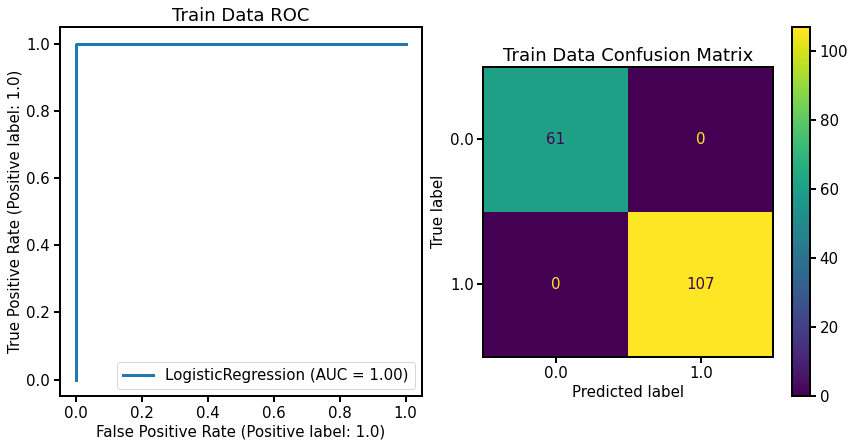

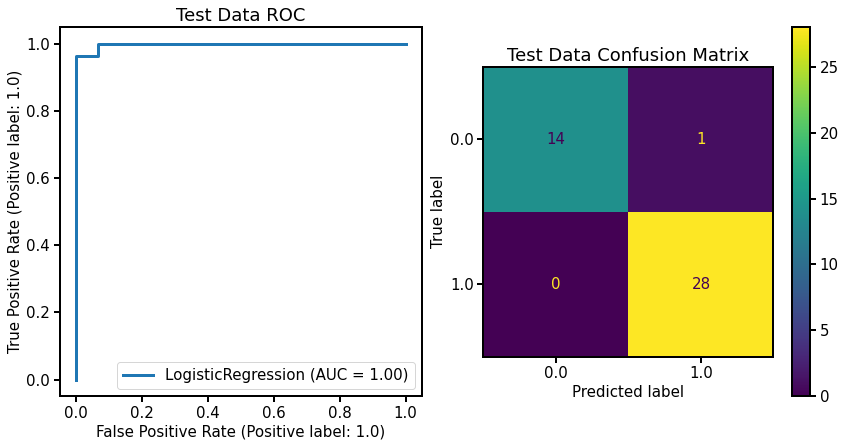

In [ ]:
########### Code #############

plot_clf(clf, X_train_scaled, y_train, "Train Data")
plot_clf(clf, X_test_scaled, y_test, "Test Data")

########### Code #############

### 1.5 (5 points) Perform a more thorough cross-validation.

Perform cross-validation.

In [ ]:
########### Code #############

scaler = preprocessing.StandardScaler()
model = LogisticRegression()
pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])

score = cross_val_score(pipeline, p1_X, p1_y, scoring='roc_auc', cv=5)
score

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([1.        , 0.99753086, 0.98765432, 1.        , 0.94814815])

Report the cross validated ROC-AUC score in terms of its mean and standard deviation.

In [ ]:
########## Answer ############

mean = np.mean(score)
std = np.std(score)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )


########## Answer ############

The mean of CV scores is 0.99
The std of CV scores is 0.02


### 1.6  (optional +2.5 points) Connect model coefficients back to metabolites

Identify the top 5 metabolites that positively correlated the most with positive diagnosis.

In [ ]:
########### Code #############

clf = LogisticRegression().fit(X_train_scaled, y_train)
weights = clf.coef_
sorted_indices = np.argsort(weights)[0][::-1]
top_5_indices = sorted_indices[:5]

metabolites = []
for i in top_5_indices:
  metabolites.append(metabolite_name[i])

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Report the metabolites you identified.

In [ ]:
########## Answer ############

print("The top 5 metabolites are {}".format(", ".join(metabolites)) )

########## Answer ############

The top 5 metabolites are L-Homoserine, 2-Butenedioic acid, 1,2-dimethylpropanol, 2,2'-Bipyridine, Myristic acid


### 1.7 (10 points) Quantify the effects of a reduced feature space

For each hypothetical featurization, obtain an average ROC-AUC and its standard deviation through a 5-fold CV. 

In [ ]:
########### Code ############# CHECK
percentages = [.05, .1, .2, .4, .6, .8]
roc_aucs = []
std_dev = []

for percent in percentages:
  scores = []
  for i in range(10):
    total_features = p1_X.shape[1]
    select_features = int(percent*total_features)
    random_indices = np.random.choice(total_features, size=select_features, replace=False)
    random_X = p1_X[:, random_indices]
    random_y = p1_y
    score = cross_val_score(pipeline, random_X, random_y, scoring='roc_auc', cv=5)
    scores.append(score)
  
  roc_aucs.append(np.mean(scores))
  std_dev.append(np.std(scores))
print(roc_aucs)
print(std_dev)

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.8210648148148149, 0.8787932098765432, 0.9401296296296298, 0.9783456790123458, 0.98620987654321, 0.9867716049382718]
[0.1447758420411667, 0.12072934005511997, 0.077045469574492, 0.02154691149351369, 0.018023918679531837, 0.01889047842904353]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Use matplotlib to generate one scatter plot showing these cross-validated test AUC score (y-axis) as a function of the different feature subset sizes (x-axis) with error bars corresponding to the standard deviations. Here, we provide an example plotting code. 

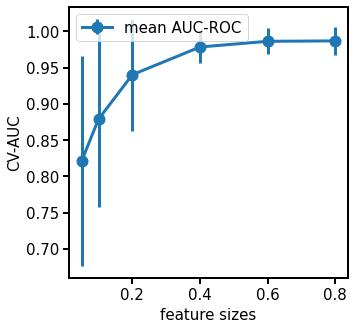

In [ ]:
########### Code #############

feature_sizes = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
y_auc = roc_aucs
y_uncer = std_dev

# plotting code 
plt.figure(figsize=(5,5)) # define figure size 
plt.errorbar(feature_sizes, y_auc, y_uncer, marker='o', ms=10, mew=2, label='mean AUC-ROC') 
plt.xlabel('feature sizes')
plt.ylabel('CV-AUC')
plt.legend()
plt.show()

########### Code #############

# <center>Problem 2 (Adding regularization to reduce overfitting)</center>

In [ ]:
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_X.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_y.csv

--2022-02-17 00:26:37--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_X.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 757566 (740K) [text/plain]
Saving to: ‘liver_X.csv.5’

liver_X.csv.5       100%[===================>] 739.81K  --.-KB/s    in 0.006s  

2022-02-17 00:26:37 (114 MB/s) - ‘liver_X.csv.5’ saved [757566/757566]

--2022-02-17 00:26:37--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps1/data/liver_y.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting res

### 2.1 (10 points) Unregularized logistic regression

Follow the same procedure from Part 1 to load the data, split the data, and scale the data.

In [ ]:
########### Code #############
from sklearn import preprocessing

# LOAD THE DATA
p2_X = pd.read_csv("./liver_X.csv", header='infer', index_col=0) # reads the csv file, containing the liver cancer feature vector inputs, into a pandas Dataframe
p2_y = pd.read_csv("./liver_y.csv", header='infer', index_col=0) # reads the csv file, containing the liver cancer labels (binary positive or negative), into a pandas Dataframe 

metabolite_name = p2_X.columns.tolist() # converts the column names (features) into a list

p2_X = p2_X.values # stores a numpy representation of the feature vector values
p2_y = p2_y.values # stores a numpy representation of the liver cancer diagnosis values

# SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(p2_X, p2_y, test_size=0.2)

# SCALE THE DATA
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

########### Code #############

Train a logistic regression model, and test its performance.

In [ ]:
########### Code #############

clf = LogisticRegression(penalty='none').fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

train_auc = roc_auc_score(y_train, clf.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generate Confusion Matrix and ROC curve.

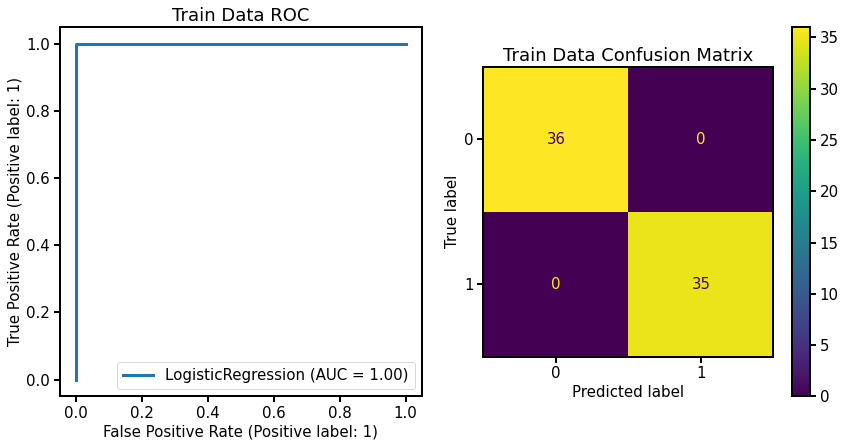

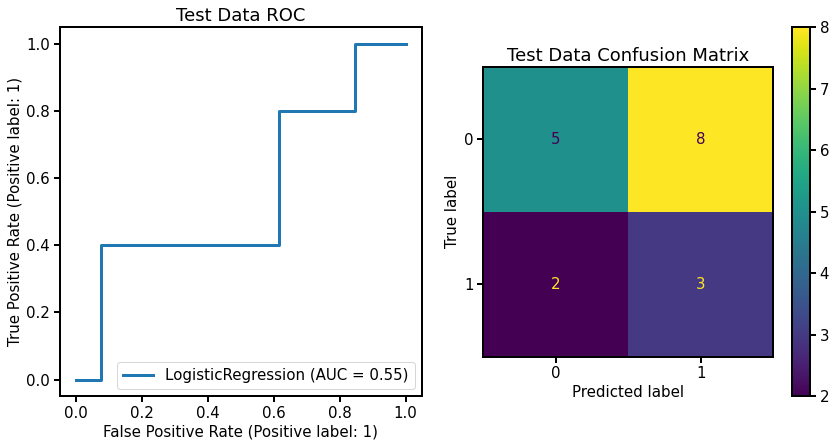

In [ ]:
########### Code #############

plot_clf(clf, X_train_scaled, y_train, "Train Data")
plot_clf(clf, X_test_scaled, y_test, "Test Data")

########### Code #############

Report your test ROC-AUC score. 

In [ ]:
########## Answer ############

print("The training AUC score is {:.2f}".format(train_auc) )
print("The testing AUC score is {:.2f}".format(test_auc) )
print("The model performs better on the training data. This could be due to overfitting on the training set and thus, lack of generalizability.")

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.55
The model performs better on the training data. This could be due to overfitting on the training set and thus, lack of generalizability.


### 2.2 (5 points) Introduce L1 regularization

Run L1-regularized logistic regression.

In [ ]:
########### Code #############

clf_reg = LogisticRegression(penalty='l1', solver='saga').fit(X_train_scaled, y_train)
clf_reg.score(X_test_scaled, y_test)

train_auc = roc_auc_score(y_train, clf_reg.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, clf_reg.predict_proba(X_test_scaled)[:, 1])

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Report ROC-AUC score.

In [ ]:
########## Answer ############

print("The training AUC score is {:.2f}".format(train_auc) )
print("The testing AUC score is {:.2f}".format(test_auc) )

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.78


Generate Confusion Matrix and ROC curve.

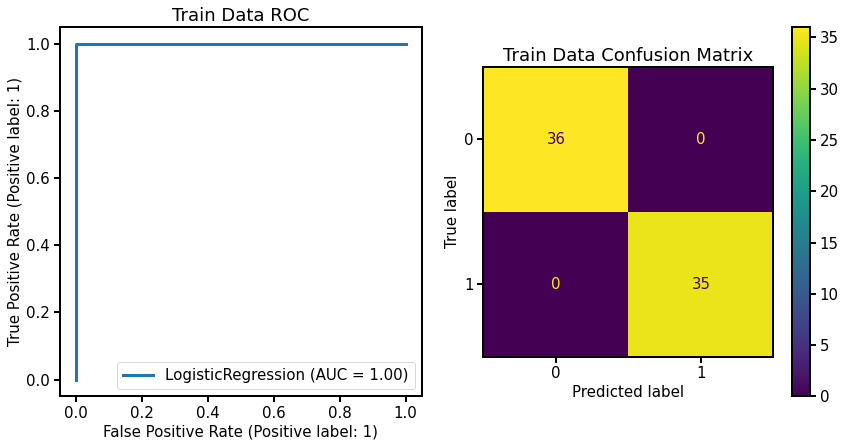

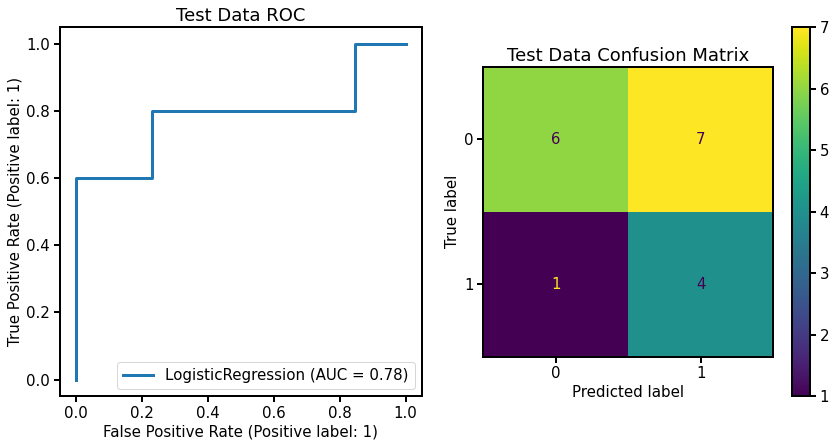

In [ ]:
########### Code #############

plot_clf(clf_reg, X_train_scaled, y_train, "Train Data")
plot_clf(clf_reg, X_test_scaled, y_test, "Test Data")

########### Code #############

Generate the histogram of model coefficients.

Text(0.5, 1.0, 'L1 Regularized Model')

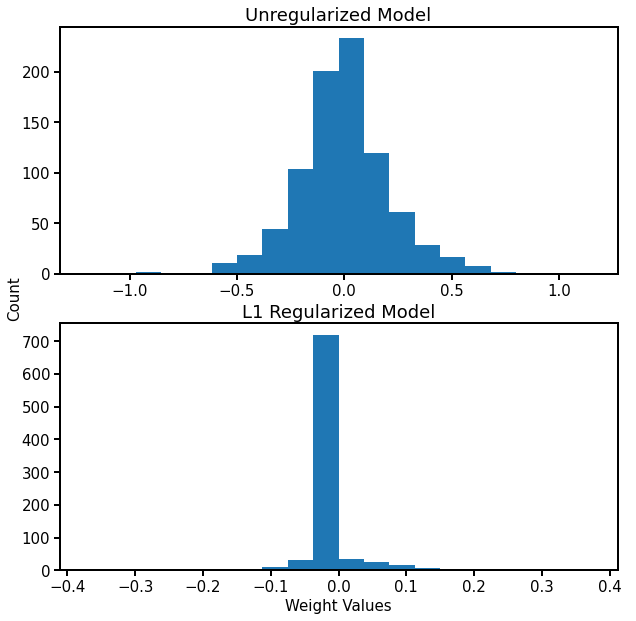

In [ ]:
########### Code #############

N_points = len(clf_reg.coef_[0])
n_bins = 20

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.hist(clf.coef_[0], bins=n_bins)
ax2.hist(clf_reg.coef_[0], bins=n_bins)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


# Set common labels
ax.set_xlabel('Weight Values')
ax.set_ylabel('Count')

ax1.set_title('Unregularized Model')
ax2.set_title('L1 Regularized Model')


########### Code #############

Comment on the histogram you obtained. 

In [ ]:
########## Answer ############

'''
The weights for the L1 regularized model are much more concentrated around
0 with less variance, compared to the unregularized model. This is because 
regularization constrains the weight values to zero to prevent overfitting
on the noise in the training data. 
'''

########## Answer ############

'\nThe weights for the L1 regularized model are much more concentrated around\n0 with less variance, compared to the unregularized model. This is because \nregularization constrains the weight values to zero to prevent overfitting\non the noise in the training data. \n'

### 2.3 (5 points) Introduce L2 regularization

Run L2-regularized logistic regression.

In [ ]:
########### Code #############

clf_reg2 = LogisticRegression(penalty='l2', solver='saga', C=0.1).fit(X_train_scaled, y_train)
clf_reg2.score(X_test_scaled, y_test)

train_auc = roc_auc_score(y_train, clf_reg2.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, clf_reg2.predict_proba(X_test_scaled)[:, 1])

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Report test ROC-AUC score.

In [ ]:
########## Answer ############

print("The training AUC score is {:.2f}".format(train_auc) )
print("The testing AUC score is {:.2f}".format(test_auc) )

########## Answer ############

The training AUC score is 1.00
The testing AUC score is 0.58


Generate Confusion Matrix and ROC curve.

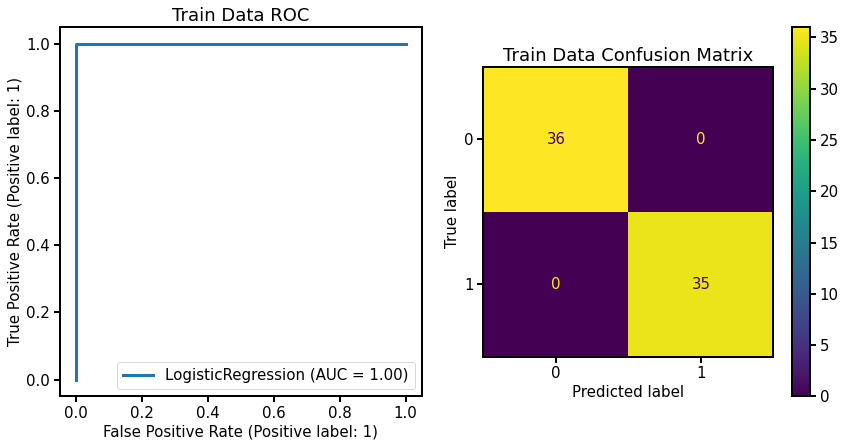

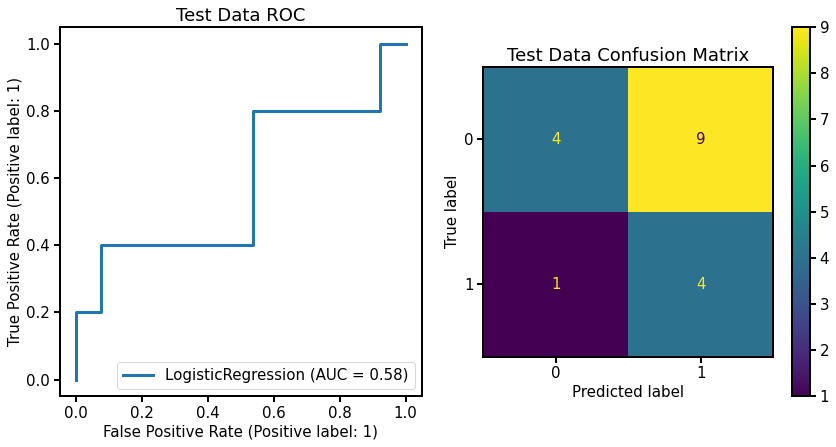

In [ ]:
########### Code #############

plot_clf(clf_reg2, X_train_scaled, y_train, "Train Data")
plot_clf(clf_reg2, X_test_scaled, y_test, "Test Data")

########### Code #############

Generate the histogram of model coefficients.

Text(0.5, 1.0, 'L2 Regularized Model')

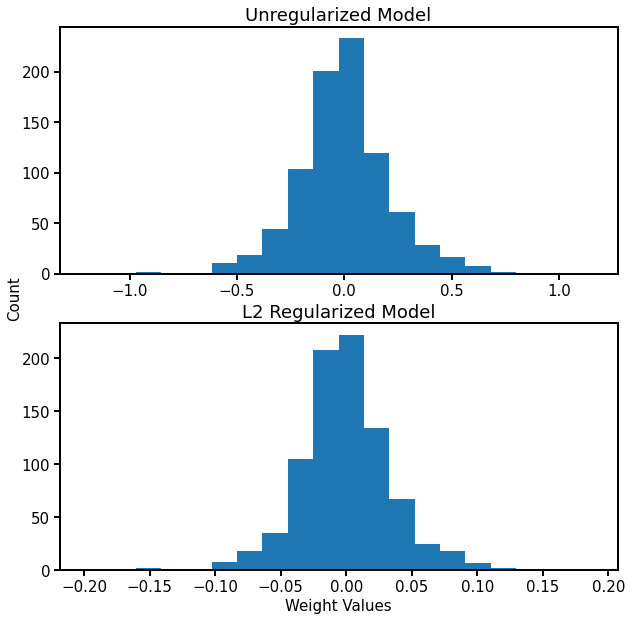

In [ ]:
########### Code #############

N_points = len(clf_reg2.coef_[0])
n_bins = 20

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.hist(clf.coef_[0], bins=n_bins)
ax2.hist(clf_reg2.coef_[0], bins=n_bins)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


# Set common labels
ax.set_xlabel('Weight Values')
ax.set_ylabel('Count')

ax1.set_title('Unregularized Model')
ax2.set_title('L2 Regularized Model')

########### Code #############

Comment on your histogram.

In [ ]:
########## Answer ############

'''
The weights for the L2 regularized model are much more concentrated around 0
with less standard deviation, compared to the unregularized model. This is
because L1 regularization penalizes the absolute values of the weights, whereas
L2 regularization penalizes the squares of weights. L1 also has a sparsifying
effect, which is seen by the greater distribution of non-zero weights.
'''

########## Answer ############

'\nThe weights for the L2 regularized model are much more concentrated around 0\nwith less standard deviation, compared to the unregularized model. This is\nbecause L1 regularization penalizes the absolute values of the weights, whereas\nL2 regularization penalizes the squares of weights. L1 also has a sparsifying\neffect, which is seen by the greater distribution of non-zero weights.\n'

### 2.4 (10 points) Quantify the extent of overfitting as a function of training set size

Run un-regularized and L1-regularized logistic regressions for the following random train/test splits:

{20%/30%, 30%/30%, 40%/30%, 50%/30%, 60%/30%}. 

In [ ]:
########### Code #############
splits = [(.2, .3), (.3, .3), (.4, .3), (.5, .3), (.6, .3)]

# unregularized
train_scores = []
test_scores = []
train_std_dev = []
test_std_dev = []

# regularized
train_scores_reg = []
test_scores_reg = []
train_std_dev_reg = []
test_std_dev_reg = []

for train, test in splits:
  temp_train_score = []
  temp_test_score = []

  temp_train_score_reg = []
  temp_test_score_reg = []

  for i in range(10):
    # SPLIT THE DATA
    X_train, X_test, y_train, y_test = train_test_split(p2_X, p2_y, train_size=train, test_size=test)

    # SCALE THE DATA
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Unregularized
    clf = LogisticRegression(penalty='none').fit(X_train_scaled, y_train)

    train_auc = roc_auc_score(y_train, clf.predict_proba(X_train_scaled)[:, 1])
    test_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
    temp_train_score.append(train_auc)
    temp_test_score.append(test_auc)

    # Regularized
    clf_reg = LogisticRegression(penalty='l1', solver='saga').fit(X_train_scaled, y_train)

    train_auc_reg = roc_auc_score(y_train, clf_reg.predict_proba(X_train_scaled)[:, 1])
    test_auc_reg = roc_auc_score(y_test, clf_reg.predict_proba(X_test_scaled)[:, 1])
    temp_train_score_reg.append(train_auc_reg)
    temp_test_score_reg.append(test_auc_reg)
  
  # unregularized
  train_scores.append(np.mean(temp_train_score))
  test_scores.append(np.mean(temp_test_score))

  train_std_dev.append(np.std(temp_train_score))
  test_std_dev.append(np.std(temp_test_score))

  # regularized
  train_scores_reg.append(np.mean(temp_train_score_reg))
  test_scores_reg.append(np.mean(temp_test_score_reg))

  train_std_dev_reg.append(np.std(temp_train_score_reg))
  test_std_dev_reg.append(np.std(temp_test_score_reg))

print("Regularized\n")
print(train_scores, test_scores)
print(train_std_dev, test_std_dev)

print("\nUnregularized\n")
print(train_scores_reg, test_scores_reg)
print(train_std_dev_reg, test_std_dev_reg)

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

Regularized

[1.0, 1.0, 1.0, 1.0, 1.0] [0.6157314825697179, 0.6049634923899629, 0.5670450627803569, 0.6060892293980529, 0.6038721926221926]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.09887725125598545, 0.14328738701935428, 0.0865251438154737, 0.12537816510172292, 0.07488401815557762]

Unregularized

[1.0, 1.0, 1.0, 1.0, 1.0] [0.6408028976527429, 0.6600841070694011, 0.6658384181178298, 0.7153270830476712, 0.7281218781218781]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.08332199155168538, 0.13291952831014783, 0.10579216803110303, 0.09629474291739108, 0.07851706345973368]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Plot training/testing ROC-AUC score as a function of train size for L1-regularized and un-regularized regressions. We have provided example plotting code with random data. You can use it as a template to generate two plots: one for the L1-regularized regression, and one for the un-regularized regression.

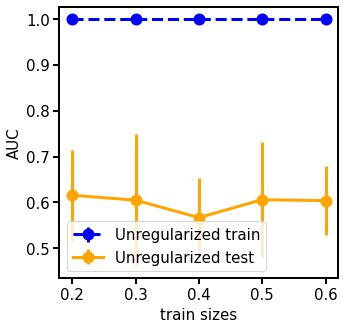

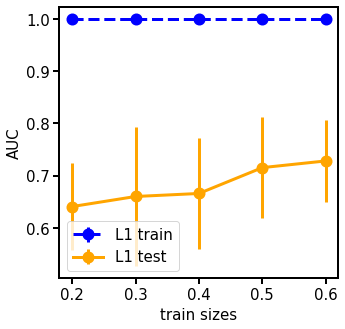

In [ ]:
########### Code #############
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

# UNREGULARIZED
# Define plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, train_scores, train_std_dev,
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='Unregularized train')

# 2nd plot
plt.errorbar(train_sizes, test_scores, test_std_dev, 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='Unregularized test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()


# REGULARIZED
# Define plots 
plt.figure(figsize=(5,5))

# first plot
plt.errorbar(train_sizes, train_scores_reg, train_std_dev_reg,
             marker='o', color='blue', linestyle='--',
             ms=10, mew=2, label='L1 train')

# 2nd plot
plt.errorbar(train_sizes, test_scores_reg, test_std_dev_reg, 
             marker='o', color='orange',  ms=10, linestyle='-', 
             mew=2, label='L1 test') # plotting for test score

plt.xlabel('train sizes')
plt.ylabel('AUC')
plt.legend()
plt.show()

########### Code #############

Comment  on  when  the  model  is  most  prone  to  poor generalization (i.e., a large gap between training and testing performance):  with or without regularization?  For large or small training set sizes?

In [ ]:
########## Answer ############

'''
The model is most prone to poor generalization for models without regularization
and for small training set sizes. This is because regularization constrains the
weights to be near zero to prevent overfitting on the noise in the training set,
which would consequently impede generalization to real-world data / the testing
set. Up to a certain extent, small training sets would not provide enough data
for the model to learn from. Therefore, it would have difficulty generalizing
to testing sets. However, too much training data can lead to overfitting and lack
of generalizability. In our case, though, this extent was not reached.
'''

########## Answer ############

'\nThe model is most prone to poor generalization for models without regularization\nand for small training set sizes. This is because regularization constrains the\nweights to be near zero to prevent overfitting on the noise in the training set,\nwhich would consequently impede generalization to real-world data / the testing\nset. Up to a certain extent, small training sets would not provide enough data\nfor the model to learn from. Therefore, it would have difficulty generalizing\nto testing sets. However, too much training data can lead to overfitting and lack\nof generalizability. In our case, though, this extent was not reached.\n'

# <center>Problem 3: Random Forests and Hyperparameter Optimization</center>

### 3.1 (5 points) Train a Random Forest classifier

Run cross-validation to train a Random Forest classifier.

In [ ]:
########### Code #############

scaler = preprocessing.StandardScaler()
model = RandomForestClassifier(max_depth=2, n_estimators=20)
pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])

score = cross_val_score(pipeline, p2_X, p2_y, scoring='roc_auc', cv=5)

########### Code #############

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Report the cross-validated ROC-AUC score.

In [ ]:
########## Answer ############

mean = np.mean(score)
std = np.std(score)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )

########## Answer ############

The mean of CV scores is 0.64
The std of CV scores is 0.14


### 3.2 (15 points) Perform a hyperparameter optimization with a grid search

In [ ]:
parameters = {'model__n_estimators': [20, 40, 80, 160, 320, 640, 1280], 
              'model__min_samples_split': [8, 10, 12, 24], 
              'model__max_depth': [2, 4, 8]}

Describe the total number of possible parameter combinations given the parameter ranges given.

In [ ]:
########## Answer ############

N_comb = len(parameters['model__n_estimators']) * len(parameters['model__min_samples_split']) * len(parameters['model__max_depth'])

print("There are {} different combinations".format(N_comb))

########## Answer ############

There are 84 different combinations


Use the provided parameter set to run grid hyperparameter search with cross-validation. 

In [ ]:
########### Code #############
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(p2_X, p2_y, train_size=.8, test_size=.2)

scaler = preprocessing.StandardScaler()
model = RandomForestClassifier(max_depth=2, n_estimators=20)
pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])
grid_search = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=5, verbose=1)
clf = grid_search.fit(X_train, y_train)


########### Code #############

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Report the obtained parameter set. Answer in code comments.

In [ ]:
########## Answer ############

clf.best_params_

# The optimized parameter set is:
# {
#    'model__n_estimators': 4,  
#    'model__min_samples_split': 10,
#    'model__max_depth': 40
# }

########## Answer ############

{'model__max_depth': 4,
 'model__min_samples_split': 10,
 'model__n_estimators': 40}

Report the best cross-validation score from your grid search.

In [ ]:
########## Answer ############

print("The best cross-validated AUC score is {:.2f}".format(clf.best_score_))

########## Answer ############

The best cross-validated AUC score is 0.74


Make predictions on the test data with your best model and report the AUC score.

In [ ]:
########## Answer ############

# scale the X_train and X_test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
clf = RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=40).fit(X_train_scaled, y_train)

# evaluate
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

print("The test AUC score calculated with the best model is {:.2f}".format(test_auc))

########## Answer ############

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


The test AUC score calculated with the best model is 0.50
